<a href="https://colab.research.google.com/github/sasha704/conjure-notebook/blob/tutorials/Futoshiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Futoshiki
Adapted from [Futoshiki](https://conjure.readthedocs.io/en/latest/tutorials.html#futoshiki) by Ruth Hoffmann and Gökberk Koçak

## Problem

In [ ]:
 !source <(curl https://raw.githubusercontent.com/conjure-cp/conjure-notebook/main/installcolab.sh)
 %load_ext conjure

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   697  100   697    0     0   1883      0 --:--:-- --:--:-- --:--:--  1883
Installing Conjure...
Conjure: The Automated Constraint Modelling Tool
Release version 2.4.0
Repository version a7382e3d9 (2022-11-21 10:41:03 +0000)


<IPython.core.display.Javascript object>

Conjure extension is loaded.
For usage help run: %conjure_help


`n x n` board where each column and row is filled with the unique numbers from 1 to `n`, similar to a sudoku. In contrast to sudoku, there are less than and greater than symbols between cells indicating that one cell has to be filled with a number greater than (or less than) than the cell on the other side of the operator.


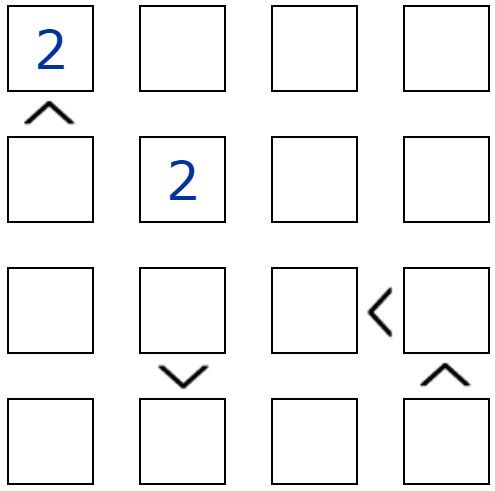

## Instance

The definition of the instance below contains the information about our starting board of a specific instance that we want to solve. See the picture at the beginning to see what it looks like.

In [ ]:
%conjure_clear

Conjure model cleared


In [ ]:
%%conjure

letting n be 4

{}

We are dealing with a 4 by 4 board.

In [ ]:
%%conjure

letting hints be function(
        (1,1) --> 2,
        (2,2) --> 2
)

{}

There will be two `2` s on the board given as a hint. One in the top left corner `(1,1)` and the second number 2 in cell `(2,2)`.

In [ ]:
%%conjure

letting less_than be relation(
        ((1,1) , (2,1)),
        ((4,2) , (3,2)),
        ((3,3) , (3,4)),
        ((3,4) , (4,4))
)

{}

There are 4 relation symbols on the board, between cells.

## Solving the problem step by step

The line by line explanation of the model starts here.

In [ ]:
%%conjure

letting DOMAIN be domain int(1..n)

{}

We start at 1 and go up to `n` (for both the elements of the cells and the cell locations).

In [ ]:
%%conjure

find board : matrix indexed by [DOMAIN, DOMAIN] of DOMAIN

{'board': {'1': {'1': 1, '2': 1, '3': 1, '4': 1},
  '2': {'1': 1, '2': 1, '3': 1, '4': 1},
  '3': {'1': 1, '2': 1, '3': 1, '4': 1},
  '4': {'1': 1, '2': 1, '3': 1, '4': 1}}}

We are now telling the solver that we are trying to find a `n x n` board with elements from 1 to `n` in each cell.

`such that` indicates the beginning of the constraints block.

In [ ]:
%%conjure

such that forAll (hint,num) in hints .
        board[hint[1], hint[2]] = num,

{'board': {'1': {'1': 2, '2': 1, '3': 1, '4': 1},
  '2': {'1': 1, '2': 2, '3': 1, '4': 1},
  '3': {'1': 1, '2': 1, '3': 1, '4': 1},
  '4': {'1': 1, '2': 1, '3': 1, '4': 1}}}

This constraint defines the hints, so the cells that are filled in when we get the puzzle.

In [ ]:
%%conjure

such that forAll i: DOMAIN .
        allDiff(board[i,..]),

{'board': {'1': {'1': 2, '2': 1, '3': 3, '4': 4},
  '2': {'1': 1, '2': 2, '3': 3, '4': 4},
  '3': {'1': 1, '2': 2, '3': 3, '4': 4},
  '4': {'1': 1, '2': 2, '3': 3, '4': 4}}}

This constraint defines that every cell in a row has to be a unique number between 1 and n.

In [ ]:
%%conjure

such that forAll j: DOMAIN .
        allDiff(board[..,j]),

{'board': {'1': {'1': 2, '2': 1, '3': 3, '4': 4},
  '2': {'1': 1, '2': 2, '3': 4, '4': 3},
  '3': {'1': 3, '2': 4, '3': 1, '4': 2},
  '4': {'1': 4, '2': 3, '3': 2, '4': 1}}}

This constraint defines that every cell in a column has to be a unique number between 1 and n.

In [ ]:
%%conjure

such that forAll (l,g) in less_than .
        board[l[1],l[2]] < board[g[1],g[2]]

{'board': {'1': {'1': 2, '2': 1, '3': 4, '4': 3},
  '2': {'1': 4, '2': 2, '3': 3, '4': 1},
  '3': {'1': 3, '2': 4, '3': 1, '4': 2},
  '4': {'1': 1, '2': 3, '3': 2, '4': 4}}}

Finally this constraint enforces the less than relation. `l` is the number that is the cell that contains the number that is less than then the cell `g`.

## Visualising the results

Printing the result gives us:

In [ ]:
for row in board:
  for square in board[row]:
    print(board[row][square], end=" ")
  print("")

2 1 4 3 
4 2 3 1 
3 4 1 2 
1 3 2 4 
